# Project 1 Starter

**Here are some tips for submitting your project. You can use the points as partial check list before submission.**

- **Give your notebook a clear and descriptive title.** 
- **Explain your work in Markdown cells.** This will make your notebook easier to read and understand. You can use different colors of font to highlight important points.
- **Remove any unnecessary code or text.** For example, you should not include the template for training and scoring in your final submission.
- **Package your submission in a single file.** I will deduct points for multiple files or incorrect folder structure.
- **Name your notebooks correctly.** Include your name and Net-ID in the file name.
- **Train your TE/WOE encoders on the training set only.** You can train them on the full dataset for your final model.
- **Test your scoring function.** Most students scoring functions in the past din't work, so make sure to test yours before submitting your project.
- **Avoid common mistakes in your scoring function.** For example, your scoring function should not:
  - drop records, expect the target to be passed
  - fit TE/WOE/Scalers
  - return anything other than a Pandas DF.
- **Make sure you have the required number of engineered features.** 
- **Don't create features and then not use them in the model**, if there is a reason not to use the feature in the model, explain.
- **Don't include models in your notebook that you didn't train.** This is considered cheating and will result in a grade of zero for the project.
- **Consistently display model performance metrics.** Use AUC or AUCPR for all models and iterations, and don't switch between metrics. For sure don't use accuracy, it is misleading metric for the imbalanced datasets. 
- **Discuss your model results in a Markdown cell.** Don't just print the results; explain what they mean.
- **Include a conclusion section in your notebook.** This is your chance to summarize your findings and discuss the implications of your work.
- **Treat your notebook like a project report that will be read by your manager who can't read Python code.** Make sure your notebook is clear, concise, and easy to understand.
- **Display a preview of your dataset that you used for training.** This will help me understand what features you used in your model.
- **Use the libraries versions specified on eLearning.** For example, you should use H2O 3.44.0.3  
- **Use Python 3.10.11.** If you use another version and your code doesn't work on 3.10.11, it will be considered a bug in your code.
- **When running H2O and want to suppress long prints (for example model summary), include ";" at the end of the command.**
- **Don't include the dataset with your deliverables.** 

## Project Requirements Summary

**This is draft - version 0 - changes are possible and will be announced.**

Project 1 is to allow students to practice Data Science concepts learned so far.

The project will include following tasks:
- Load dataset. Don't use "index" column for training.
- Clean up the data:
    - Encode/replace missing values
    - Replace features values that appear incorrect
- Encode categorical variables
- Split dataset to Train/Validation/Test
- Add engineered features
- Train and tune ML model
- Provide final metrics using Test dataset
- Provide a scoring function that can be used to score new data. You can test your scoring function on the provided "scoring" dataset.

**Don't use PCA or TruncatedSVD for this project.** The goal of using Linear models is to be able to interpret the results via coefficients, and PCA/TruncatedSVD will make use of coefficients unusable for interpretation.

### Types of models to train

Your final submission should include single model. 
The model set you should try to come up with best model per type of model:
1. Identify best model from: Sklearn Logistic Regression - try all combinations of regularization
2. Identify best model from: H2O-3 GLM - try different combinations of regularization

**Evaluation metric: AUCPR**

### Feature engineering

You should train/fit categorical features scalers and encoders on Train only. Use `transform` or equivalent function on Validation/Test datasets.

It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


You should generate various new features. Examples of such features can be seen in the Module-3 lecture on GLMs.  
Your final model should have at least **10** new engineered features.   
On-hot-encoding, label encoding, and target encoding **is not included in the** **10** features to create.    
You can attempt target encoding, however the technique is not expected to produce improvement for Linear models.

Ideas for Feature engineering for various types of variables:
1. https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/transformations.html
2. GLM lecture and hands-on (Module-3)


**Note**: 
- You don't have to perform feature engineering using H2O-3 even if you decided to use H2O-3 GLM for model training.
- It is OK to perform feature engineering using any technique, as long as you can replicate it correctly in the Scoring function.

### Threshold calculation

You will need to calculate optimal threshold for class assignment using F1 metric:
- If using sklearn, use F1 `macro`: `f1_score(y_true, y_pred, average='macro')` 
- If using H2O-3, use F1

You will need to find optimal probability threshold for class assignment, the threshold that maximizes above F1.

### Scoring function

The Project-1 will be graded based on the completeness and performance of your final model against the hold-out dataset.
The hold-out dataset will not be known to the students. As part of your deliverables, you will need to submit a scoring function. 

You need to submit a scoring function for the best model you trained, either Sklearn or H2O-3 model.  

The scoring function will perform the following:
- Accept dataset in the same format as provided with the project, minus "MIS_Status" column
- Load trained model and any encoders/scalers that are needed to transform data
- Transform dataset into format that can be scored with the trained model
- Score the dataset and return the results, for each record
    - Record ID
    - Record label as determined by final model (0 or 1)
    - If your model returns probabilities, you need to assign the label based on maximum F1 threshold
    
Scoring function header:
```
def project_1_scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return labels
    
    """
    l = data.shape[0]
    return l*[0]
```

Look for full example of scoring function at the bottom of the notebook. **Don't copy as is - this is just an example**

### Deliverables in a single zip file in the following structure:
- `notebook` (folder)
    - Jupyter notebook with complete code to manipulate data, train and tune final model. `ipynb` format.
    - Jupyter notebook with scoring function. `ipynb` format.
- `artifacts` (folder)
    - Model and any potential encoders in the "pkl" format or native H2O-3 format (for H2O-3 model)
    - Scoring function that will load the final model and encoders. Separate from above notebook or `.py` file



Your notebook should include explanations about your code and be designed to be easily followed and results replicated. Once you are done with the final version, you will need to test it by running all cells from top to bottom after restarting Kernel. It can be done by running `Kernel -> Restart & Run All`


**Important**: To speed up progress, first produce working code using a small subset of the dataset.

## Additional Details

### Dataset description

The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.    


More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied

**Don't use original dataset, use only dataset provided with project requirements in eLearning**

### Dataset preparation and clean-up

Modify and clean-up the dataset as following:
- Replace encode Na/Null values
- Convert the strings to floats/integers as needed

Any additional clean-up as you find fit.

In [128]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [129]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

## Loading the data set and dropping the index column

In [130]:
data = pd.read_csv('SBA_loans_project_1.csv')
data.drop(columns="index",inplace=True) #dropping the index column

In [131]:
print("Data shape:", data.shape)

Data shape: (800255, 19)


In [132]:
data.head(5)

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,APPLETON,WI,59414,ASSOCIATED BANK NATL ASSOC,WI,321918,26,1.00,0,0,1,0,0,N,100000.00,0.00,100000.00,80000.00,0
1,WEATHERFORD,TX,76086,REGIONS BANK,AL,621391,2,1.00,1,3,0,1,N,N,146200.00,0.00,146200.00,124270.00,0
2,FLORENCE,SC,29505,"SUPERIOR FINANCIAL GROUP, LLC",CA,236220,3,1.00,3,3,0,1,N,N,20000.00,0.00,20000.00,17000.00,1
3,BOSTON,MA,2124,CITIZENS BANK NATL ASSOC,RI,236115,5,1.00,0,5,1,1,N,N,73100.00,0.00,75000.00,37500.00,1
4,LAFAYETTE,IN,47904,THE HUNTINGTON NATIONAL BANK,OH,0,82,1.00,0,0,1,0,N,Y,80000.00,0.00,80000.00,64000.00,0


## Reviewing the Dataset

## Preparation and clean up

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800255 entries, 0 to 800254
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               800227 non-null  object 
 1   State              800244 non-null  object 
 2   Zip                800255 non-null  int64  
 3   Bank               798881 non-null  object 
 4   BankState          798874 non-null  object 
 5   NAICS              800255 non-null  int64  
 6   NoEmp              800255 non-null  int64  
 7   NewExist           800134 non-null  float64
 8   CreateJob          800255 non-null  int64  
 9   RetainedJob        800255 non-null  int64  
 10  FranchiseCode      800255 non-null  int64  
 11  UrbanRural         800255 non-null  int64  
 12  RevLineCr          796214 non-null  object 
 13  LowDoc             797959 non-null  object 
 14  DisbursementGross  800255 non-null  float64
 15  BalanceGross       800255 non-null  float64
 16  Gr

In [134]:
cols_to_convert = ['Zip', 'NAICS', 'NewExist','FranchiseCode', 'UrbanRural']
data[cols_to_convert] = data[cols_to_convert].astype('object')

In [135]:
desc_df = describe_more(data)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,City,31090,object,1,30,"{'LOS ANGELES': 10265, 'HOUSTON': 9166, 'NEW Y..."
1,State,51,object,2,3,"{'CA': 116234, 'TX': 62648, 'NY': 51520, 'FL':..."
2,Zip,32655,object,1,5,"{10001: 843, 90015: 816, 93401: 702, 90010: 64..."
3,Bank,5690,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 77280, 'WELLS F..."
4,BankState,55,object,2,3,"{'CA': 105036, 'NC': 70727, 'IL': 58662, 'OH':..."
5,NAICS,1306,object,1,6,"{0: 179808, 722110: 24960, 722211: 17305, 8111..."
6,NoEmp,579,int64,1,4,"{1: 137210, 2: 123131, 3: 80793, 4: 65687, 5: ..."
7,NewExist,3,object,3,3,"{1.0: 573786, 2.0: 225426, 0.0: 922}"
8,CreateJob,230,int64,1,4,"{0: 560211, 1: 56249, 2: 51419, 3: 25670, 4: 1..."
9,RetainedJob,346,int64,1,4,"{0: 392105, 1: 78963, 2: 68443, 3: 44463, 4: 3..."


In [136]:
categorical_cols = ['City', 'State', 'Bank', 'BankState', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Zip', 'NAICS', 'FranchiseCode']
numerical_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']

In [137]:
pd.options.display.float_format = '{:.2f}'.format
data[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
NoEmp,800255.00,11.43,75.20,0.00,2.00,4.00,10.00,9999.00
CreateJob,800255.00,8.45,237.17,0.00,0.00,0.00,1.00,8800.00
RetainedJob,800255.00,10.81,237.47,0.00,0.00,1.00,4.00,9500.00
DisbursementGross,800255.00,200972.36,287426.39,0.00,42000.00,100000.00,237276.00,11446325.00
BalanceGross,800255.00,3.26,1527.42,0.00,0.00,0.00,0.00,996262.00
GrAppv,800255.00,192522.90,282915.42,200.00,35000.00,90000.00,225000.00,5472000.00
SBA_Appv,800255.00,149341.43,227960.45,100.00,21250.00,61200.00,175000.00,5472000.00


In [138]:
data[categorical_cols].describe().T

,count,unique,top,freq
City,800227,31090,LOS ANGELES,10265
State,800244,51,CA,116234
Bank,798881,5690,BANK OF AMERICA NATL ASSOC,77280
BankState,798874,55,CA,105036
NewExist,800134.00,3.00,1.00,573786.00
UrbanRural,800255,3,1,418792
RevLineCr,796214,17,N,374209
LowDoc,797959,8,N,696572
Zip,800255,32655,10001,843
NAICS,800255,1306,0,179808


In [139]:
data.isnull().sum()

City                   28
State                  11
Zip                     0
Bank                 1374
BankState            1381
NAICS                   0
NoEmp                   0
NewExist              121
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4041
LowDoc               2296
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

The dataset has a large number of missing values, as can be seen. We'll substitute the correct values for the missing ones. If the column is numeric, for instance, the column median will be used to fill in the missing numbers. In the event that the column is categorical, the mode of the column will be used to fill in the missing values.

## Filling Misssing values
With the mode aggregation in categorical columns

In [140]:
#For categorical columns
for column in categorical_cols:
  data[column]=data[column].fillna(data[column].mode()[0])

#None of the numerical columns has missing values
for column in numerical_cols:
  data[column]=data[column].fillna(0)

In [141]:
data.isnull().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [142]:
data.groupby(by=["MIS_Status"])["MIS_Status"].count()
#Looks like an unbalanced data set

MIS_Status
0    660075
1    140180
Name: MIS_Status, dtype: int64

## Handling Invalid Data

Removing extra variables in RevlineCr, LowDoc and NewExist

In [143]:
#show unique values in each column and its data type
for col in data.columns:
    print(f'{col} unique values are {data[col].unique()}')
    print(f'{col} data type is {data[col].dtype}')
    print("\n")

City unique values are ['APPLETON' 'WEATHERFORD' 'FLORENCE' ... 'ALLEGHENY' 'COUNCIL BLUFF'
 'RICHOMD HILL']
City data type is object


State unique values are ['WI' 'TX' 'SC' 'MA' 'IN' 'UT' 'OH' 'NJ' 'NV' 'NC' 'NY' 'WA' 'MT' 'KS'
 'MI' 'IL' 'CT' 'OR' 'CA' 'FL' 'ID' 'MO' 'NH' 'VA' 'GA' 'LA' 'MS' 'AR'
 'VT' 'PA' 'MD' 'HI' 'MN' 'WV' 'AL' 'KY' 'ND' 'RI' 'IA' 'CO' 'AZ' 'TN'
 'DE' 'NE' 'OK' 'SD' 'NM' 'WY' 'ME' 'AK' 'DC']
State data type is object


Zip unique values are [59414 76086 29505 ... 49656 19361 89211]
Zip data type is int64


Bank unique values are ['ASSOCIATED BANK NATL ASSOC' 'REGIONS BANK'
 'SUPERIOR FINANCIAL GROUP, LLC' ... 'LONE STAR BANK, S.S.B.'
 'GOUVERNEUR S & L ASSOC' 'PEKIN COMMUNITY BANK']
Bank data type is object


BankState unique values are ['WI' 'AL' 'CA' 'RI' 'OH' 'UT' 'NC' 'NY' 'VA' 'MT' 'IL' 'MA' 'MI' 'CT'
 'OR' 'DC' 'SC' 'KS' 'ID' 'MO' 'SD' 'WA' 'GA' 'LA' 'FL' 'AR' 'VT' 'DE'
 'IN' 'MD' 'TX' 'HI' 'MN' 'WV' 'NV' 'ND' 'PA' 'IA' 'CO' 'NH' 'AZ' 'NE'
 'MS' 'OK' 'NM'

# Removing extra variables
In RevLineCr, LowDoc, and NewExist

In [144]:
value_counts = data['RevLineCr'].value_counts()
print(value_counts)

RevLineCr
N    378250
0    229202
Y    179202
T     13541
1        21
R        14
`         9
2         6
C         2
4         1
Q         1
5         1
-         1
.         1
3         1
,         1
7         1
Name: count, dtype: int64


In [145]:
data['RevLineCr'] = data['RevLineCr'].map({'N':'N','Y':'Y','0':'N','1':'Y','T':'Y'})
data = data[data['RevLineCr'].isin(['N','Y'])]
data['RevLineCr'].unique()

array(['N', 'Y'], dtype=object)

In [146]:
value_counts = data['LowDoc'].value_counts()
print(value_counts)

LowDoc
N    698837
Y     98358
0      1310
C       666
S       530
A       444
R        70
1         1
Name: count, dtype: int64


In [147]:
data['LowDoc'] = data['LowDoc'].map({'N':'N','Y':'Y','0':'N','1':'Y'})
data = data[data['LowDoc'].isin(['N','Y'])]
data['LowDoc'].unique()

array(['N', 'Y'], dtype=object)

In [148]:
value_counts = data['NewExist'].value_counts()
print(value_counts)

NewExist
1.00    572959
2.00    224629
0.00       918
Name: count, dtype: int64


In [149]:
data = data[data['NewExist'].isin([1, 2])]
data['NewExist'].unique()

array([1., 2.])

In [150]:
data.fillna(value=np.nan, inplace=True)
data.dropna(inplace=True)
# Reset index
data.reset_index(drop=True, inplace=True)

In [151]:
data.shape

(797588, 19)

In [152]:
data.isnull().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [153]:
col18 = data.pop(data.columns[18]) # Adjusting MIS_status column position
data.insert(0, col18.name, col18)

In [154]:
data.head()

,MIS_Status,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv
0,0,APPLETON,WI,59414,ASSOCIATED BANK NATL ASSOC,WI,321918,26,1.00,0,0,1,0,N,N,100000.00,0.00,100000.00,80000.00
1,0,WEATHERFORD,TX,76086,REGIONS BANK,AL,621391,2,1.00,1,3,0,1,N,N,146200.00,0.00,146200.00,124270.00
2,1,FLORENCE,SC,29505,"SUPERIOR FINANCIAL GROUP, LLC",CA,236220,3,1.00,3,3,0,1,N,N,20000.00,0.00,20000.00,17000.00
3,1,BOSTON,MA,2124,CITIZENS BANK NATL ASSOC,RI,236115,5,1.00,0,5,1,1,N,N,73100.00,0.00,75000.00,37500.00
4,0,LAFAYETTE,IN,47904,THE HUNTINGTON NATIONAL BANK,OH,0,82,1.00,0,0,1,0,N,Y,80000.00,0.00,80000.00,64000.00


In [155]:
h2o_data = data.copy() # Keeping dataset handy for H2O-GLM Model

### Categorical and numerical variables encoding

Encode categorical variables using either one of the techniques below. Don't use LabelEncoder.
- One-hot-encoder for variables with less than 10 valid values. Name your new columns "Original_name"_valid_value. If you drop one of the columns, make it clear what valid value is reference value.
- Target encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_trg
- WOE encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_woe


WOE encoder can be used with numerical variables too. 


Example of use for target encoder:
```
import category_encoders as ce

encoder = ce.TargetEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X_dirty)
```

In [156]:
import numpy as np

#Adding Engineered Features

#1. Creating a feature that is indicating the ratio of retained jobs to created jobs
data['Retained_Created_Job_Ratio'] = data['RetainedJob'] /(data['CreateJob'] + 1)

#2. Calculating SBA's Guarenteed Portion of Approved Loan
data['Guaren_SBA_Appv'] =  data['SBA_Appv']/ data['GrAppv']
    
#3. Creating a feature that is indicating the ratio of the loan amount disbursed to the gross amount approved
data['Loan_Gross_Ratio'] = data['DisbursementGross']/ data['GrAppv']
    
#4. Creating a feature that is indicating the ratio of the SBA loan amount to the gross disbursement
data['SBA_Loan_Gross_Ratio'] = data['SBA_Appv'] / data['DisbursementGross']

#5. Calculating 'EmployeesToLoanRatio' as a ratio of 'NoEmp' to 'SBA_Appv' 
data['EmployeesToLoanRatio'] = data['NoEmp'] / data['SBA_Appv']
    
#6. Creating a feature that is log transformation of Disbursement Gross
data['LogDisbursementGross'] = np.log(data['DisbursementGross'] + 1)
    
#7. Creating a feature that is Log Transformation of SBA Approval Amount
data['LogSBAApprovalAmount'] = np.log(data['SBA_Appv'] + 1)

#8. Creating a feature that is indicating if loan is originated Loan same state
data['BankOriginatedLoan'] = np.where(data['State'] == data['BankState'], 1, 0)

#9. Creating a feature that is indicating loan amount to income ratio or disbursement amount per employees
data['LoanToIncomeRatio'] = data['DisbursementGross'] / (data['NoEmp'] + 1)

#10. Creating a feature that is Total Jobs which is sum of new and previous jobs
data['TotalJobs'] = data['CreateJob'] + data['RetainedJob']


## Added engineered features explanation

1. Retained_Created_Job_Ratio: This feature represents the ratio of retained jobs to created jobs. This can be an important indicator of the borrower's ability to sustain their business in the long run.
2. Gauren_SBA_Appv: Its values are calculated by dividing the 'SBA_Appv' column (SBA’s guaranteed amount of approved loan) by 'GrAppv' column (gross amount approved by the lender) for each corresponding row. This ratio helps you analyze the extent to which the SBA is guaranteeing the loan relative to the total loan amount approved by the lender.
3. Loan_Gross_Ratio: This feature represents the ratio of the loan amount to the gross disbursement. It can give an indication of the financial risk associated with the loan.
4. SBA_Loan_Gross_Ratio: This feature represents the ratio of the SBA loan amount to the gross disbursement. It can give an indication of the SBA's involvement in the loan.
5. EmployeesToLoanRatio:  its values are calculated by dividing the 'NoEmp' column (number of employees) by the 'SBA_Appv' column (approved SBA loan amount) for each corresponding row. This ratio can help you analyze the relationship between the number of employees and the size of the SBA loan approved for each entry in the dataset.
6. LogDisbursementGross: This feature is a logarithmic transformation of the Disbursement Gross amount. This can help in handling the wide range of values and outliers in this feature.
7. LogSBAApprovalAmount: This feature is a logarithmic transformation of the SBA Approval Amount. This can help in handling the wide range of values and outliers in this feature.
8. BankOriginatedLoan: This feature indicates whether the loan was originated by the same bank as the borrower's bank state. A binary feature with value 1 for bank originated loans and 0 for other loans.
9. LoanToIncomeRatio: This feature represents the loan amount to income ratio or disbursement amount per employees. It can give an indication of the borrower's ability to repay the loan.
10.  TotalJobs variable which is an addition of Createjobs(New people recruited) and RetainedJob (workers working before)

In [157]:
data.head()

,MIS_Status,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Retained_Created_Job_Ratio,Guaren_SBA_Appv,Loan_Gross_Ratio,SBA_Loan_Gross_Ratio,EmployeesToLoanRatio,LogDisbursementGross,LogSBAApprovalAmount,BankOriginatedLoan,LoanToIncomeRatio,TotalJobs
0,0,APPLETON,WI,59414,ASSOCIATED BANK NATL ASSOC,WI,321918,26,1.00,0,0,1,0,N,N,100000.00,0.00,100000.00,80000.00,0.00,0.80,1.00,0.80,0.00,11.51,11.29,1,3703.70,0
1,0,WEATHERFORD,TX,76086,REGIONS BANK,AL,621391,2,1.00,1,3,0,1,N,N,146200.00,0.00,146200.00,124270.00,1.50,0.85,1.00,0.85,0.00,11.89,11.73,0,48733.33,4
2,1,FLORENCE,SC,29505,"SUPERIOR FINANCIAL GROUP, LLC",CA,236220,3,1.00,3,3,0,1,N,N,20000.00,0.00,20000.00,17000.00,0.75,0.85,1.00,0.85,0.00,9.90,9.74,0,5000.00,6
3,1,BOSTON,MA,2124,CITIZENS BANK NATL ASSOC,RI,236115,5,1.00,0,5,1,1,N,N,73100.00,0.00,75000.00,37500.00,5.00,0.50,0.97,0.51,0.00,11.20,10.53,0,12183.33,5
4,0,LAFAYETTE,IN,47904,THE HUNTINGTON NATIONAL BANK,OH,0,82,1.00,0,0,1,0,N,Y,80000.00,0.00,80000.00,64000.00,0.00,0.80,1.00,0.80,0.00,11.29,11.07,0,963.86,0


In [158]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(999, inplace=True)

In [159]:
h2o_data=data.copy() #copy after adding engineered features

In [160]:
from sklearn.model_selection import train_test_split

#Splitting the dataset into train (60%), validation (20%), and test (20%) sets
train_val, test = train_test_split(data, test_size=0.2, random_state=182)
train, val = train_test_split(train_val, test_size=0.25, random_state=182)

#Checking the size of each set
print(f"Train set size: {len(train)}")
print(f"Validation set size: {len(val)}")
print(f"Test set size: {len(test)}")

Train set size: 478552
Validation set size: 159518
Test set size: 159518


In [161]:
# Identifying categorical and numerical variables
categorical_cols = ['City', 'State', 'Zip', 'Bank', 'BankState', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'NAICS', 'FranchiseCode']
numerical_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']

data2 = data.copy(deep=True) #before encoding copy

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from copy import deepcopy
import pickle

#Categorical encoders dictionary
cat_encoders = {}
#New categorical (encoded) columns
cat_enc_columns = []

for col in categorical_cols:
        if train[col].nunique() < 10:
            print("One-hot encoding of ", col)
            enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
            enc.fit(train[[col]])
            result = enc.transform(train[[col]])
            ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
            cat_enc_columns = cat_enc_columns + ohe_columns
            result_train = pd.DataFrame(result, columns=ohe_columns, index=train.index)
            train = pd.concat([train, result_train.reindex(data.index)], axis=1, join='inner')
            train.drop(columns=[col], inplace=True)
            #Encode Testing
            result = enc.transform(test[[col]])
            result_test = pd.DataFrame(result, columns=ohe_columns, index=test.index)
            test = pd.concat([test, result_test.reindex(data.index)], axis=1, join='inner')
            test.drop(columns=[col], inplace=True)
            #Encode Validation
            result = enc.transform(val[[col]])
            result_val = pd.DataFrame(result, columns=ohe_columns, index=val.index)
            val = pd.concat([val, result_val.reindex(data.index)], axis=1, join='inner')
            cat_encoders[col] = [deepcopy(enc), "ohe"]
            val.drop(columns=[col], inplace=True)
            
        else:
            print("WOE encoding of ", col)
            woe_encoder = ce.WOEEncoder(cols=[col])
            woe_encoder1= woe_encoder.fit(train[col], train['MIS_Status'])
            train[col+'_woe'] = woe_encoder1.transform(train[col])
            test[col+'_woe'] = woe_encoder1.transform(test[col])
            val[col+'_woe'] = woe_encoder1.transform(val[col])
            train.drop(columns=[col], inplace=True)
            test.drop(columns=[col], inplace=True)
            val.drop(columns=[col], inplace=True)


WOE encoding of  City
WOE encoding of  State
WOE encoding of  Zip
WOE encoding of  Bank
WOE encoding of  BankState
One-hot encoding of  NewExist
One-hot encoding of  UrbanRural
One-hot encoding of  RevLineCr
One-hot encoding of  LowDoc
WOE encoding of  NAICS
WOE encoding of  FranchiseCode


Dropping one reference for all one hot encoded columns.
Both RevlineCr and LowDoc has only 2 valid values 'Y' or 'N' after data cleaning. So, after performing the One-hot encoding of the above 2 columns, in order to avoid collinearity between the columns, its better to drop one of the columns. So Dropping RevLineCr_Yes and LowDoc_Yes (these are the reference values). Also dropping one of the columns is gonna help us with the coefficients.

Column "UrbanRural" has 3 vaild values 0=undefined , 1=Urban and 2=Rural . So Dropping UrbanRural_1 (as refernce )

In [162]:
train.pop("RevLineCr_Y")
train.pop("LowDoc_Y")
train.pop("UrbanRural_1")
train.pop("NewExist_1.0")
test.pop("RevLineCr_Y")
test.pop("LowDoc_Y")
test.pop("UrbanRural_1")
test.pop("NewExist_1.0")
val.pop("RevLineCr_Y")
val.pop("LowDoc_Y")
val.pop("UrbanRural_1")
val.pop("NewExist_1.0")

599832   1.00
409223   1.00
288861   0.00
263868   1.00
725280   1.00
         ... 
460024   0.00
244397   0.00
272692   0.00
466190   1.00
613198   0.00
Name: NewExist_1.0, Length: 159518, dtype: float64

In [163]:
train.head()

,MIS_Status,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Retained_Created_Job_Ratio,Guaren_SBA_Appv,Loan_Gross_Ratio,SBA_Loan_Gross_Ratio,EmployeesToLoanRatio,LogDisbursementGross,LogSBAApprovalAmount,BankOriginatedLoan,LoanToIncomeRatio,TotalJobs,City_woe,State_woe,Zip_woe,Bank_woe,BankState_woe,NewExist_2.0,UrbanRural_0,UrbanRural_2,RevLineCr_N,LowDoc_N,NAICS_woe,FranchiseCode_woe
770207,0,3,0,0,135000.00,0.00,135000.00,114750.00,0.00,0.85,1.00,0.85,0.00,11.81,11.65,0,33750.00,0,0.01,0.02,-0.49,-1.82,-0.61,1.00,0.00,0.00,1.00,0.00,-1.31,-0.41
627924,0,3,0,0,133900.00,0.00,133900.00,100425.00,0.00,0.75,1.00,0.75,0.00,11.80,11.52,1,33475.00,0,1.55,-0.16,1.55,-0.50,-0.71,1.00,0.00,0.00,1.00,0.00,0.41,-0.41
359837,1,3,1,4,97673.00,0.00,50000.00,25000.00,2.00,0.50,1.95,0.26,0.00,11.49,10.13,1,24418.25,5,-0.90,0.07,-0.83,-1.00,0.27,0.00,0.00,1.00,0.00,1.00,0.59,-0.41
711331,1,2,0,2,30000.00,0.00,30000.00,15000.00,2.00,0.50,1.00,0.50,0.00,10.31,9.62,0,10000.00,2,1.66,0.16,1.38,0.57,0.15,1.00,0.00,0.00,1.00,1.00,0.74,-0.41
219449,0,34,34,0,220000.00,0.00,220000.00,220000.00,0.00,1.00,1.00,1.00,0.00,12.30,12.30,1,6285.71,34,0.43,0.33,0.52,-2.84,-0.87,1.00,1.00,0.00,1.00,1.00,-0.36,-0.41


In [164]:
from sklearn.preprocessing import StandardScaler
num_scalers = {}

numerical_cols = ['NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']

'''Scaling only original numerical columns'''
for col in numerical_cols:
        print("Standard scale of ", col)
        scaler = StandardScaler()
        scaler.fit(train[[col]])
        pickle.dump(scaler, open(col+'_sc_'+'pre_processing.p', "wb"))
        train[col+"_sc"] = scaler.transform(train[[col]])
        test[col+"_sc"] = scaler.transform(test[[col]])
        val[col+"_sc"] = scaler.transform(val[[col]])
        num_scalers[col] = [deepcopy(scaler),"Standard"]
        train.drop(columns=[col], inplace=True)
        test.drop(columns=[col], inplace=True)
        val.drop(columns=[col], inplace=True)

Standard scale of  NoEmp
Standard scale of  CreateJob
Standard scale of  RetainedJob
Standard scale of  DisbursementGross
Standard scale of  BalanceGross
Standard scale of  GrAppv
Standard scale of  SBA_Appv


In [165]:
train.columns

Index(['MIS_Status', 'Retained_Created_Job_Ratio', 'Guaren_SBA_Appv',
       'Loan_Gross_Ratio', 'SBA_Loan_Gross_Ratio', 'EmployeesToLoanRatio',
       'LogDisbursementGross', 'LogSBAApprovalAmount', 'BankOriginatedLoan',
       'LoanToIncomeRatio', 'TotalJobs', 'City_woe', 'State_woe', 'Zip_woe',
       'Bank_woe', 'BankState_woe', 'NewExist_2.0', 'UrbanRural_0',
       'UrbanRural_2', 'RevLineCr_N', 'LowDoc_N', 'NAICS_woe',
       'FranchiseCode_woe', 'NoEmp_sc', 'CreateJob_sc', 'RetainedJob_sc',
       'DisbursementGross_sc', 'BalanceGross_sc', 'GrAppv_sc', 'SBA_Appv_sc'],
      dtype='object')

In [166]:
train.head()

,MIS_Status,Retained_Created_Job_Ratio,Guaren_SBA_Appv,Loan_Gross_Ratio,SBA_Loan_Gross_Ratio,EmployeesToLoanRatio,LogDisbursementGross,LogSBAApprovalAmount,BankOriginatedLoan,LoanToIncomeRatio,TotalJobs,City_woe,State_woe,Zip_woe,Bank_woe,BankState_woe,NewExist_2.0,UrbanRural_0,UrbanRural_2,RevLineCr_N,LowDoc_N,NAICS_woe,FranchiseCode_woe,NoEmp_sc,CreateJob_sc,RetainedJob_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc
770207,0,0.00,0.85,1.00,0.85,0.00,11.81,11.65,0,33750.00,0,0.01,0.02,-0.49,-1.82,-0.61,1.00,0.00,0.00,1.00,0.00,-1.31,-0.41,-0.12,-0.04,-0.05,-0.23,-0.00,-0.20,-0.15
627924,0,0.00,0.75,1.00,0.75,0.00,11.80,11.52,1,33475.00,0,1.55,-0.16,1.55,-0.50,-0.71,1.00,0.00,0.00,1.00,0.00,0.41,-0.41,-0.12,-0.04,-0.05,-0.23,-0.00,-0.21,-0.21
359837,1,2.00,0.50,1.95,0.26,0.00,11.49,10.13,1,24418.25,5,-0.90,0.07,-0.83,-1.00,0.27,0.00,0.00,1.00,0.00,1.00,0.59,-0.41,-0.12,-0.03,-0.03,-0.36,-0.00,-0.50,-0.54
711331,1,2.00,0.50,1.00,0.50,0.00,10.31,9.62,0,10000.00,2,1.66,0.16,1.38,0.57,0.15,1.00,0.00,0.00,1.00,1.00,0.74,-0.41,-0.13,-0.04,-0.04,-0.59,-0.00,-0.57,-0.59
219449,0,0.00,1.00,1.00,1.00,0.00,12.30,12.30,1,6285.71,34,0.43,0.33,0.52,-2.84,-0.87,1.00,1.00,0.00,1.00,1.00,-0.36,-0.41,0.31,0.11,-0.05,0.07,-0.00,0.10,0.31


In [167]:
print(train.dtypes)

MIS_Status                      int64
Retained_Created_Job_Ratio    float64
Guaren_SBA_Appv               float64
Loan_Gross_Ratio              float64
SBA_Loan_Gross_Ratio          float64
EmployeesToLoanRatio          float64
LogDisbursementGross          float64
LogSBAApprovalAmount          float64
BankOriginatedLoan              int32
LoanToIncomeRatio             float64
TotalJobs                       int64
City_woe                      float64
State_woe                     float64
Zip_woe                       float64
Bank_woe                      float64
BankState_woe                 float64
NewExist_2.0                  float64
UrbanRural_0                  float64
UrbanRural_2                  float64
RevLineCr_N                   float64
LowDoc_N                      float64
NAICS_woe                     float64
FranchiseCode_woe             float64
NoEmp_sc                      float64
CreateJob_sc                  float64
RetainedJob_sc                float64
Disbursement

## Model Tuning

You should tune two types of models: one Sklearn and one H2O-3. Perform tuning for the selected model type from the set of Linear models available in Sklearn and H2O-3:
- Hyper-parameter tuning. Your hyper-parameter search space should have at least 50 combinations.
- To avoid overfitting and provide you with reasonable estimate of model performance on hold-out dataset, you will need to split your dataset as following:
    - Train, will be used to train model
    - Validation, will be used to validate model each round of training
    - Testing, will be used to provide final performance metrics, used only once on the final model
- Feature engineering. See project description

**Select final model that produces best performance on the Test dataset.**
- For the best model, calculate probability threshold to maximize F1. 

## Logistic Regression from sklearn

In [168]:
y_train = train['MIS_Status']
X_train = train.drop(columns='MIS_Status')
y_valid = val['MIS_Status']
X_valid = val.drop(columns='MIS_Status')
y_test = test['MIS_Status']
X_test = test.drop(columns='MIS_Status')

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((478552, 29), (478552,), (159518, 29), (159518,), (159518, 29), (159518,))

In [42]:
train.shape

(478552, 30)

In [43]:
X_train.iloc[5:10]

,Retained_Created_Job_Ratio,Guaren_SBA_Appv,Loan_Gross_Ratio,SBA_Loan_Gross_Ratio,EmployeesToLoanRatio,LogDisbursementGross,LogSBAApprovalAmount,BankOriginatedLoan,LoanToIncomeRatio,TotalJobs,City_woe,State_woe,Zip_woe,Bank_woe,BankState_woe,NewExist_2.0,UrbanRural_0,UrbanRural_2,RevLineCr_N,LowDoc_N,NAICS_woe,FranchiseCode_woe,NoEmp_sc,CreateJob_sc,RetainedJob_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc
189492,0.00,0.90,1.00,0.90,0.00,11.51,11.41,1,7692.31,0,0.16,0.15,-0.53,0.57,-0.76,0.00,1.00,0.00,1.00,0.00,-0.85,-0.41,0.01,-0.04,-0.05,-0.35,-0.00,-0.33,-0.26
474501,0.70,0.50,1.65,0.30,0.00,12.01,10.82,1,23549.00,16,0.20,0.57,0.78,1.04,-0.12,0.00,0.00,0.00,0.00,1.00,1.18,0.89,-0.07,0.00,-0.02,-0.12,-0.00,-0.33,-0.43
705982,20.00,0.50,1.86,0.27,0.00,10.24,8.92,0,1329.05,20,0.99,-0.17,1.15,-0.25,0.04,0.00,0.00,1.00,0.00,1.00,-0.31,-0.41,0.12,-0.04,0.04,-0.60,-0.00,-0.63,-0.62
603171,8.33,0.90,1.00,0.90,0.00,13.53,13.43,1,29038.46,27,1.08,0.07,-0.07,0.35,0.27,0.00,0.00,0.00,1.00,1.00,-0.16,0.89,0.19,-0.03,0.06,1.93,-0.00,1.99,2.32
197688,0.33,0.90,0.60,1.49,0.00,11.74,12.14,0,62720.50,3,0.70,0.01,0.27,0.04,-0.35,1.00,0.00,0.00,1.00,1.00,-1.65,0.89,-0.14,-0.03,-0.04,-0.26,-0.00,0.05,0.16


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.pipeline import Pipeline

In [46]:
#Training a base logistic regression model
#%%time
logreg = LogisticRegression(C=0.1 , max_iter=100,
                            penalty= 'l1',
                            solver= 'liblinear')
logreg.fit(X_train, y_train)
# print logreg accuracy score, confusion matrix and auc score
print("Logistic Regression Accuracy Score: ", logreg.score(X_train, y_train))
print("Logistic Regression Accuracy Score: ", logreg.score(X_valid, y_valid))
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_train, logreg.predict(X_train))/X_train.shape[0])
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_valid, logreg.predict(X_valid))/X_valid.shape[0])
print("Logistic Regression AUC Score: ", roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1]))
print("Logistic Regression AUC Score: ", roc_auc_score(y_valid, logreg.predict_proba(X_valid)[:,1]))

Logistic Regression Accuracy Score:  0.8447483241110684
Logistic Regression Accuracy Score:  0.8345014355746687
Logistic Regression Confusion Matrix: 
 [[0.79743894 0.02771277]
 [0.12753891 0.04730938]]
Logistic Regression Confusion Matrix: 
 [[0.79476924 0.03036021]
 [0.13513835 0.03973219]]
Logistic Regression AUC Score:  0.8149091343269976
Logistic Regression AUC Score:  0.7754839235514934


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import auc, precision_recall_curve
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

In [65]:
param_grid = {'penalty': ['l1', 'l2'],
          'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'solver': ['liblinear']}

In [81]:
#target_col = "MIS_Status"
y = y_train[:10000] #doing with only 10000 records as it is time taking to fit gridsearch
X = X_train[:10000]

In [82]:
# logistic regression model
clf = LogisticRegression(max_iter=100, random_state=0, n_jobs=-1)
clf.fit(X, y)

LogisticRegression(n_jobs=-1, random_state=0)

In [83]:
# Initiating a GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(clf, param_grid, cv=5, verbose=1,n_jobs=-1, scoring='average_precision')

In [84]:
# Fitting it to the training data
logreg_cv.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='average_precision', verbose=1)

In [85]:
from sklearn.metrics import f1_score
import numpy as np

def calculate_optimal_threshold(classifier, X, y):
    # Predict probabilities
    y_prob = classifier.predict_proba(X)[:, 1]
    
    # Generate a range of thresholds
    thresholds = np.linspace(0, 1, 100)
    
    # Compute F1 scores for different thresholds
    f1_scores = [f1_score(y, (y_prob > threshold).astype(int), average='macro') for threshold in thresholds]
    
    # Find the optimal threshold with the highest F1 score
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    
    return optimal_threshold

In [86]:
# Printing the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))
threshold= calculate_optimal_threshold(logreg_cv, X, y)



Tuned Logistic Regression Parameter: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.5257061089985562


In [ ]:
y_proba = logreg.predict_proba(X[:159518])[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
auc_pr = auc(recall, precision)

In [90]:
calculate_optimal_threshold(logreg_cv, X, y)

0.29292929292929293

In [ ]:
from sklearn.metrics import confusion_matrix

In [92]:
# Use the best hyperparameters to fit the Logistic Regression model on the entire training set
lr_model = LogisticRegression(solver='liblinear',C=10 , max_iter=100,
                            penalty= 'l1')
lr_model.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [93]:
# Use the trained model to predict on the validation set
y_pred_val = lr_model.predict(X_valid)

In [95]:
# Calculate AUCPR score on the validation set
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, precision_recall_curve,auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

auc_val = roc_auc_score(y_valid, y_pred_val)
auc_val

0.5948889582318118

In [98]:
# Use the trained model to predict on the test set
y_pred_test = lr_model.predict(X_test)

# Calculate AUCROC score on the test set
auc_test = roc_auc_score(y_test, y_pred_test)
aucpr_test = average_precision_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, average='macro')

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test)
aucpr = auc(recall, precision)
print("AUCPR:", aucpr)

f1_scores = (2 * precision * recall) / (precision + recall)
f1_threshold = thresholds[np.argmax(f1_scores)]

print("AUC test",auc_test)
print("AUCPR on test data: {:.4f}".format(aucpr))
print("F1 for Test:", f1)
print("F1 threshold on test data: {:.4f}".format(f1_threshold))
print("Test set confusion matrix:")
print(confusion_matrix(y_test, y_pred_test))



AUCPR: 0.4591640495972339
AUC test 0.5924858905315376
AUCPR on test data: 0.4592
F1 for Test: 0.6113160770966404
F1 threshold on test data: 1.0000
Test set confusion matrix:
[[126518   4926]
 [ 21829   6245]]


# H2O GLM model 

In [99]:
import h2o
try:
    h2o.init()
    h2o.cluster().shutdown()
except:
    pass 

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17+35-LTS-2724, mixed mode, sharing)
  Starting server from C:\Users\Lahari Reddy\aml-spring-2024\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\LAHARI~1\AppData\Local\Temp\tmp3wy6l2r2
  JVM stdout: C:\Users\LAHARI~1\AppData\Local\Temp\tmp3wy6l2r2\h2o_Lahari_Reddy_started_from_python.out
  JVM stderr: C:\Users\LAHARI~1\AppData\Local\Temp\tmp3wy6l2r2\h2o_Lahari_Reddy_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,3 months and 5 days
H2O_cluster_name:,H2O_from_python_Lahari_Reddy_a0m7qp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.930 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


H2O session _sid_b244 closed.


In [100]:
#Limit to 8 threads and 16GB memory
h2o.init(nthreads=8, max_mem_size=16)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17+35-LTS-2724, mixed mode, sharing)
  Starting server from C:\Users\Lahari Reddy\aml-spring-2024\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\LAHARI~1\AppData\Local\Temp\tmp26nnf5vk
  JVM stdout: C:\Users\LAHARI~1\AppData\Local\Temp\tmp26nnf5vk\h2o_Lahari_Reddy_started_from_python.out
  JVM stderr: C:\Users\LAHARI~1\AppData\Local\Temp\tmp26nnf5vk\h2o_Lahari_Reddy_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,3 months and 5 days
H2O_cluster_name:,H2O_from_python_Lahari_Reddy_xfr37s
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [101]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
df_h= h2o.H2OFrame(h2o_data) #cleaned data set imported as H2o frame
df_h.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


MIS_Status,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Retained_Created_Job_Ratio,Guaren_SBA_Appv,Loan_Gross_Ratio,SBA_Loan_Gross_Ratio,EmployeesToLoanRatio,LogDisbursementGross,LogSBAApprovalAmount,BankOriginatedLoan,LoanToIncomeRatio,TotalJobs
0,APPLETON,WI,59414,ASSOCIATED BANK NATL ASSOC,WI,321918,26,1,0,0,1,0,N,N,100000,0,100000,80000,0,0.8,1,0.8,0.000325,11.5129,11.2898,1,3703.7,0
0,WEATHERFORD,TX,76086,REGIONS BANK,AL,621391,2,1,1,3,0,1,N,N,146200,0,146200,124270,1.5,0.85,1,0.85,1.6094e-05,11.8927,11.7302,0,48733.3,4
1,FLORENCE,SC,29505,"SUPERIOR FINANCIAL GROUP, LLC",CA,236220,3,1,3,3,0,1,N,N,20000,0,20000,17000,0.75,0.85,1,0.85,0.000176471,9.90354,9.74103,0,5000,6
1,BOSTON,MA,2124,CITIZENS BANK NATL ASSOC,RI,236115,5,1,0,5,1,1,N,N,73100,0,75000,37500,5,0.5,0.974667,0.512996,0.000133333,11.1996,10.5321,0,12183.3,5
0,LAFAYETTE,IN,47904,THE HUNTINGTON NATIONAL BANK,OH,0,82,1,0,0,1,0,N,Y,80000,0,80000,64000,0,0.8,1,0.8,0.00128125,11.2898,11.0667,0,963.855,0
1,Naples,UT,84078,MOUNTAIN AMERICA FCU,UT,811192,4,2,0,4,0,2,Y,N,60086,0,30000,15000,4,0.5,2.00287,0.249642,0.000266667,11.0035,9.61587,1,12017.2,4
0,NEW RICHMOND,OH,45157,FIFTH THIRD BANK,OH,722110,1,1,0,25,1,1,N,N,101300,0,101300,75975,25,0.75,1,0.75,1.31622e-05,11.5259,11.2382,1,50650,25
1,UNION (UNIONBURY),NJ,7083,BANK OF AMERICA NATL ASSOC,NC,541511,2,1,1,3,1,1,Y,N,79147,0,44100,22050,1.5,0.5,1.79472,0.278596,9.07029e-05,11.2791,10.0011,0,26382.3,4
1,LAS VEGAS,NV,89121,BANK OF AMERICA NATL ASSOC,NC,453910,1,1,0,1,1,1,Y,N,12705,0,10000,5000,1,0.5,1.2705,0.393546,0.0002,9.44983,8.51739,0,6352.5,1
0,BELMONT,NC,28012,COMMUNITYONE BANK NATL ASSOC,NC,541213,1,2,0,0,1,0,N,Y,25000,0,25000,20000,0,0.8,1,0.8,5e-05,10.1267,9.90354,1,12500,0


In [102]:
# check if the data frame is indeed H2OFrame
if isinstance(df_h, h2o.H2OFrame):
    print('It is H2O data frame')
else:
    print('It is not H2O data frame')

It is H2O data frame


In [103]:
# Split the data as described above
train1, valid1, test1 = df_h.split_frame([0.6, 0.2], seed=1234)
# Preparing predictors and response columns
train1_X = df_h.columns
train1_y = "MIS_Status"
train1_X.remove(train1_y)

The above code splits an H2O DataFrame into training, validation, and test sets and separates
predictor columns from the response column for machine learning tasks.
The first number, 6.7, specifies tha6 70% of the data will be used for training (the "train" subset).
The second number,2.15, specifies th20 15% of the data will be used for validation (the "valid"
subset).
The remai20ng 15% not specified is implicitly used for testing (the "test" subset).
The seed=1234 parameter is used to set the random seed for reproducibility, ensuring that the
same split is obtained when the code is executed multiple times.

Since we already imported the H2O GLM estimator, we will just instantiate our model. For
simplicity, the name of our model will be glm. To build a GLM, you just need to define the family,
and you are ready to go. However, we will set a random seed for reproducibility purposes, and
also a model id to be able to retrieve the model later on if we need to access it. You can
instantiate your GLM, as shown below

In [104]:
#Training a default glm model
glm = H2OGeneralizedLinearEstimator(family = "binomial", seed = 42,
model_id = 'default_glm')
%time 
glm.train(x = train1_X, y = train1_y, training_frame = train1,
validation_frame = valid1)

CPU times: total: 0 ns
Wall time: 0 ns
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: default_glm


GLM Model: summary
    family    link    regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.01508 )  36829                         12                             5                       py_3_sid_ad28

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13390835867435247
RMSE: 0.3659349104340176
LogLoss: 0.42678273963400637
AUC: 0.7067276848685912
AUCPR: 0.29686788972660033
Gini: 0.41345536973718233
Null degrees of freedom: 478960
Residual degrees of freedom: 478948
Null deviance: 444953.57731932815
Residual deviance: 408824.57551568665
AIC: 408850.57551568665

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2315464331286563
       0       1       Error    Rate
-----  ------  ------  -------  -------------------
0      303435  91469   0.2316   (91469.0/394904.0)
1      37225   46832   0.4429   (37225.0/84057.0)
Total  340660  138301  0.2687   (128694.0/478961.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.231546     0.421231  173
max f2                       0.11498      0.559238  305
max f0point5                 0.240029     0.36985   165
max accuracy                 0.607038     0.824495  0
max precision                0.257056     0.346966  149
max recall                   0.0360706    1         396
max specificity              0.607038     0.999992  0
max absolute_mcc             0.2337       0.273301  171
max min_per_class_accuracy   0.181601     0.662158  223
max mean_per_class_accuracy  0.202698     0.663684  200
max tns                      0.607038     394901    0
max fns                      0.607038     84057     0
max fps                      0.0179361    394904    399
max tps                      0.0360706    84057     396
max tnr                      0.607038     0.999992  0
max fnr                      0.607038     1         0
max fpr                      0.0179361    1         399
max tpr                      0.0360706    1         396

Gains/Lift Table: Avg response rate: 17.55 %, avg score: 17.55 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.0100008                   0.395678           1.58689   1.58689            0.278497         0.419151   0.278497                    0.419151            0.0158702       0.0158702                  58.6889    58.6889            0.00711869
2        0.0200016                   0.368646           1.91164   1.74927            0.335491         0.380765   0.306994                    0.399958            0.019118        0.0349882                  91.1642    74.9266            0.0181765
3        0.0300004                   0.351555           1.6717    1.72341            0.293381         0.359486   0.302457                    0.386469            0.0167148       0.051703                   67.1698    72.3413            0.0263222
4        0.0400012                   0.341325           1.62496   1.6988             0.285177         0.346046   0.298137                    0.376363            0.0162509       0.067953

AUCPR (Area Under the Precision-Recall Curve) is a metric that measures the trade-off between precision and recall for a binary classification model.
AUCPR summarizes how well a model is at ranking the positive class instances higher than the negative class instances.

From the summary results, we can see the GLM performance. We will focus on the Area Under
the Curve of precision recall cureve(AUCPR), and since we have a very imbalanced dataset, we will be looking at the F1 score.
Additionally, we will also take a quick look at the misclassification error and logloss.
From the report, we can look at the metrics on the training and validation data, and we see that
the training AUCPR was AUCPR: 0.29686788972660033 while the validation AUCPR:
0.29515234336240487

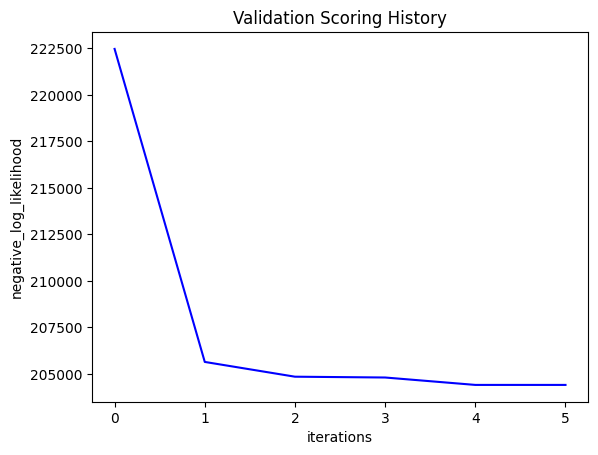

In [106]:
glm.plot(metric='negative_log_likelihood')

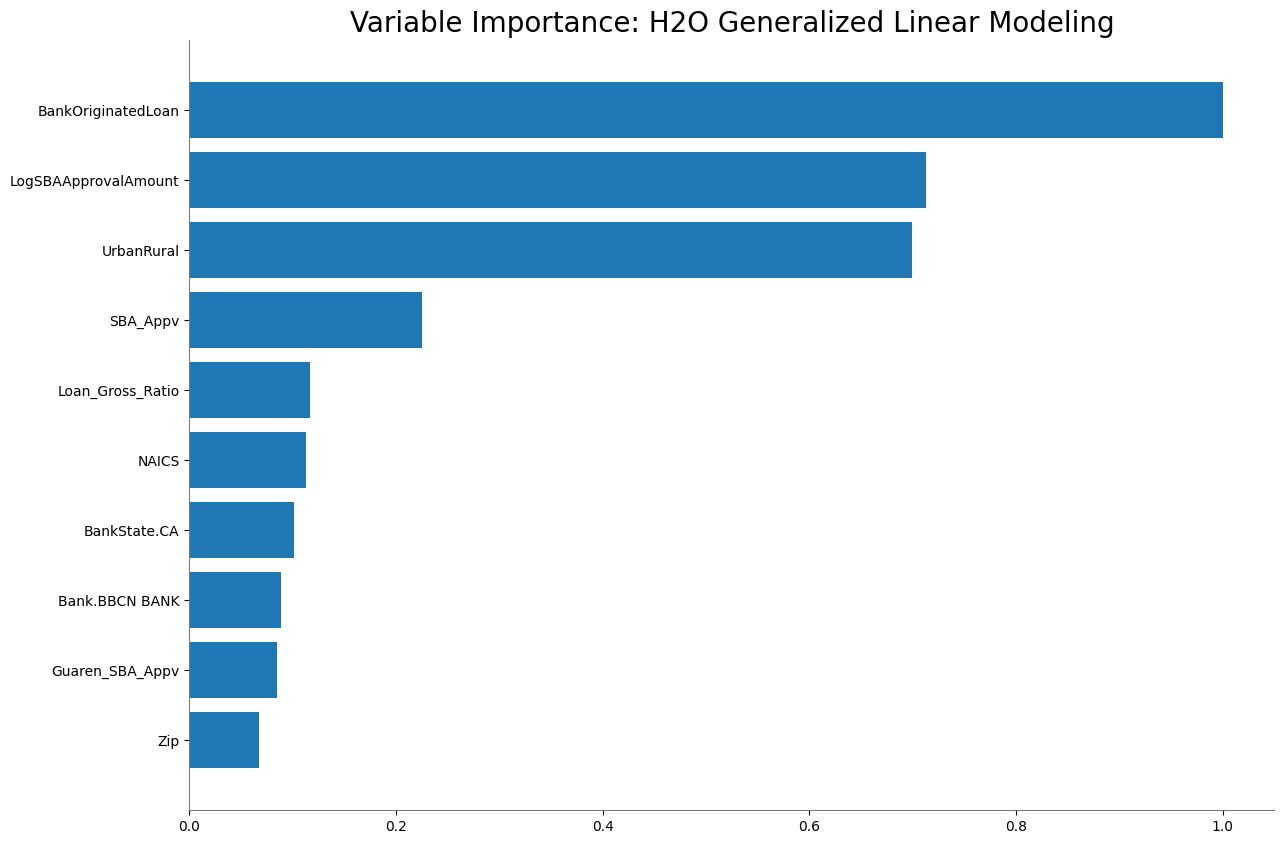

<Figure size 640x480 with 0 Axes>

In [107]:
glm.varimp_plot()

In [108]:
glm.predict(valid1).head(10)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.91217,0.0878296
1,0.735839,0.264161
0,0.945489,0.0545114
0,0.833601,0.166399
0,0.849629,0.150371
0,0.900388,0.0996125
1,0.72937,0.27063
0,0.908561,0.0914387
0,0.920856,0.0791438
0,0.808977,0.191023


We Tune our model with lambda_search = True, as this will automatically tune the model. Other parameters that we can alter are
max_active_predictors (feature selection parameter), nlambdas, which allows you to specify the number of lambda values, or the
regularization strengths, to be used in the elastic net regularization path, and solver, which specify the algorithm or optimization method
that the GLM model should use to find the solution.

A value of alpha = 1 represents Lasso Regularization and a value ofalpha = 0 produces Ridge regression
lambda is employed for regularization strength missing_value_handlingparameter allows to specify how we want to handle any missing data
(options are skip and MeanImputation)

In [109]:
glm_grid = h2o.grid.H2OGridSearch (
H2OGeneralizedLinearEstimator(family = "binomial",
lambda_search = True),
hyper_params = {"alpha": [x*0.01 for x in range(0, 50)],
"missing_values_handling" : ["Skip",
"MeanImputation"]},
grid_id = "glm_random_grid",
search_criteria = {
"strategy":"RandomDiscrete",
"max_models":300,
"max_runtime_secs":300,
"seed":42})
%time
glm_grid.train(x = train1_X, y = train1_y, training_frame = train1,
validation_frame = valid1)

CPU times: total: 0 ns
Wall time: 0 ns
glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,alpha,missing_values_handling,model_ids,logloss
,0.48,Skip,glm_random_grid_model_2,0.4101730
,0.32,Skip,glm_random_grid_model_6,0.4116312
,0.3,Skip,glm_random_grid_model_1,0.4118532
,0.2,MeanImputation,glm_random_grid_model_3,0.4132255
,0.19,Skip,glm_random_grid_model_5,0.4133988
,0.05,MeanImputation,glm_random_grid_model_4,0.4180333


In [110]:
sorted_glm_grid = glm_grid.get_grid(sort_by = 'aucpr', decreasing =
True)
sorted_glm_grid.sorted_metric_table()
best_model_id = sorted_glm_grid.sorted_metric_table()['model_ids'][0]
best_model_id

'glm_random_grid_model_2'

In [111]:
sorted_glm_grid

,alpha,missing_values_handling,model_ids,aucpr
,0.48,Skip,glm_random_grid_model_2,0.3804676
,0.32,Skip,glm_random_grid_model_6,0.3727924
,0.3,Skip,glm_random_grid_model_1,0.3715576
,0.2,MeanImputation,glm_random_grid_model_3,0.3638036
,0.19,Skip,glm_random_grid_model_5,0.3628418
,0.05,MeanImputation,glm_random_grid_model_4,0.3334778


As in this case we can see the best model is glm_random_grid_model_12 with AUCPR values as 0.3804676

In [112]:
tuned_glm = sorted_glm_grid.models[0]
tuned_glm.summary()

,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,binomial,logit,"Elastic Net (alpha = 0.48, lambda = 0.001571 )","nlambda = 100, lambda.max = 0.1571, lambda.min = 0.001571, lambda.1se = -1.0",36829,42,100,py_3_sid_ad28


Lets evaluate the model on the validation set

In [113]:
tuned_glm_perf = tuned_glm.model_performance(valid1)
print("Default GLM AUCPR: %.4f \nTuned GLM AUCPR:%.4f" % (glm.aucpr(),
tuned_glm_perf.aucpr()))

Default GLM AUCPR: 0.2969 
Tuned GLM AUCPR:0.3805


This suggests that the tuned GLM model having higher AUCPR and generalizes better than the default model

## Finding the threshold

In [114]:
# Finding the threshold
f1_scores = []
y_pred_proba= logreg.predict_proba(X_test)[:, 1]
for threshold in np.arange(0.1, 0.9, 0.05):
    y_pred = (y_pred_proba > threshold).astype(int)
    f1_scores.append(f1_score(y_test,  logreg.predict(X_test),average='macro'))
best_threshold = 0.1 + 0.05 * np.argmax(f1_scores)

#print(f"Best hyperparameters: {best_params}")
#print(f'The F1 score on val data: {f1_val:.3f}')
#print(f'The F1 score on test data: {f1_test:.3f}')
print(f"Best threshold: {best_threshold:.3f}")
f1_scores

Best threshold: 0.100


[0.6114252610589317,
 0.6114252610589317,
 0.6114252610589317,
 0.6114252610589317,
 0.6114252610589317,
 0.6114252610589317,
 0.6114252610589317,
 0.6114252610589317,
 0.6114252610589317,
 0.6114252610589317,
 0.6114252610589317,
 0.6114252610589317,
 0.6114252610589317,
 0.6114252610589317,
 0.6114252610589317,
 0.6114252610589317]

## Save all artifacts

Save all artifacts needed for scoring function:
- Trained model
- Encoders
- Any other arficats you will need for scoring

**You should stop your notebook here. Scoring function should be in a separate file/notebook.**

In [125]:
import pickle
# making the artifacts dictionary with model and threshold
artifacts_dict = {
    "model": logreg,
    "threshold": 0.60,
    "feature_names": X_train.columns
}
# writing the pickle file with wb parameters
artifacts_dict_file = open("artifacts_dict_file.pkl", "wb")
# dumping the object in the file
pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)
# finally closing the file
artifacts_dict_file.close() 

In [116]:
import pickle

# Assuming you have a variable named 'best_params' containing the best hyperparameters
best_params = logreg_cv.best_params_

with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

## Project Summary and Conclusion

Provide your summary and conclusion. The summary should include:
- Summary of your work
- Summary of your findings
- Summary of your model performance
- Summary of your recommendations

I trained a model with all engineered, scaled and encoded features using Linear Regression. Also performed hyperparameter search to find the best model. Did the similar thing using H20.
Comparing those two, the best model in sklearn has a AUCPR of 0.4592 where as with H2o it is 0.3805
Since the performance of the model as compared using AUCPR is less for models trained using H2O GLM hyperparameter tuning. I decided to go with the lr-model which was trained using sklearn

## Stop Here. Create new file/notebook

Don't include scoring function in the same notebook as your project. Create a new notebook or python file for scoring function.

# Exporting Scalars and the model

In [118]:
import pickle

# Assuming you have a variable named 'best_params' containing the best hyperparameters
best_params = logreg_cv.best_params_

with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [169]:

# Saving the artifacts
artifacts_dict = {"model": logreg, "threshold": 0.60,"woe_encoder": woe_encoder, "feature_names": X_train.columns}


artifacts_dict_file = open("artifacts_dict_file.pkl", "wb")
pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)

artifacts_dict_file.close() 

### Model Scoring

Write function that will load artifacts from above, transform and score on a new dataset.
Your function should return Python list of labels. For example: [0,1,0,1,1,0,0]


In [54]:
def project_1_scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return pandas DF with following columns:
            - index
            - label
            - probability_0
            - probability_1
    """
    pass

### Example of Scoring function

Don't copy the code as is. It is provided as an example only. 
- Function `train_model` - you need to focus on model and artifacts saving:
    ```
    pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)
    ```
- Function `project_1_scoring` - you should have similar function with name `project_1_scoring`. The function will:
    - Get Pandas dataframe as parameter
    - Will load model and all needed encoders
    - Will perform needed manipulations on the input Pandas DF - in the exact same format as input file for the project, minus MIS_Status feature
    - Return Pandas DataFrame
        - record index
        - predicted class for threshold maximizing F1
        - probability for class 0 (PIF)
        - probability for class 1 (CHGOFF)


Don't copy the below cell code in any way!!! The code is provided as an example only.  
- The code is provided as an example of generating artifacts for scoring function
- Your scoring function code should not have model training part!!!!

In [55]:
"""
Don't copy of use the cell code in any way!!!
The code is provided as an example of generating artifacts for scoring function
Your scoring function code should not have model training part!!!!
"""
import pandas as pd
import numpy as np
def train_model(data):
    """
    Train sample model and save artifacts
    """
    from sklearn.preprocessing import OneHotEncoder
    from copy import deepcopy
    from sklearn.linear_model import LogisticRegression
    import pickle
    from sklearn.impute import SimpleImputer
    
    target_col = "Survived"
    cols_to_drop = ['Name', 'Ticket', 'Cabin','SibSp', 'Parch', 'Sex','Embarked','PassengerId','Survived']
    y = data[target_col]
    X = data.drop(columns=[target_col])
    
    # Impute Embarked
    X['Embarked'].replace(np.NaN, 'S',inplace = True)
    
    # Create new feature
    X['FamilySize'] = X['SibSp'] + X['Parch']
    
    # Mean impute Age
    imp_age_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_age_mean.fit(X[['Age']])
    X['Age'] = imp_age_mean.transform(X[['Age']])


    ohe_orig_columns = ["Embarked","Sex"]
    cat_encoders = {}
    for col in ohe_orig_columns:
        enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        enc.fit(X[[col]])
        result = enc.transform(X[[col]])
        ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
        result_train = pd.DataFrame(result, columns=ohe_columns)
        X= pd.concat([X, result_train], axis=1)
        cat_encoders[col] = [deepcopy(enc),"ohe"]
        
    clf = LogisticRegression(max_iter=1000, random_state=0)
    
    columns_to_train = [x for x in X.columns if x not in cols_to_drop]
    print("Training on following columns:", columns_to_train)
    clf.fit(X[columns_to_train], y)
    
    # Todo: Add code to calculate optimal threshold. Replace 0.5 !!!!!
    threshold = 0.5
    # End Todo
    
    artifacts_dict = {
        "model": clf,
        "cat_encoders": cat_encoders,
        "imp_age_mean": imp_age_mean,
        "ohe_columns": ohe_orig_columns,
        "columns_to_train":columns_to_train,
        "threshold": threshold
    }
    artifacts_dict_file = open("./artifacts/artifacts_dict_file.pkl", "wb")
    pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)
    
    artifacts_dict_file.close()    
    return clf

In [ ]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('titanic.csv')
target_col = "Survived"
y = df[target_col]
X = df.drop(columns=[target_col])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=142)

# Reset index to avoid bug with OHE encoder due to index mismatch
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)


df_train = X_train.copy()
df_train[target_col] = y_train
train_model(df_train)

### Example scoring function

This is example only. Don't copy the code as is!!!   
You must place scoring function in a separate Python file or Jupyter notebook.   

**Don't place function in the same notebook as rest of the code**

In [ ]:
def project_1_scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return labels
    
    """
    from sklearn.preprocessing import OneHotEncoder
    from copy import deepcopy
    from sklearn.linear_model import LogisticRegression
    import pickle
    
    X = data.copy()
    
    '''Load Artifacts'''
    artifacts_dict_file = open("./artifacts/artifacts_dict_file.pkl", "rb")
    artifacts_dict = pickle.load(file=artifacts_dict_file)
    artifacts_dict_file.close()
    
    clf = artifacts_dict["model"]
    cat_encoders = artifacts_dict["cat_encoders"]
    imp_age_mean = artifacts_dict["imp_age_mean"]
    ohe_columns = artifacts_dict["ohe_columns"]
    columns_to_score = artifacts_dict["columns_to_train"]
    threshold = artifacts_dict["threshold"]
    
    # Impute Embarked
    X['Embarked'].replace(np.NaN, 'S',inplace = True)
    
    # Create new feature
    X['FamilySize'] = X['SibSp'] + X['Parch']
    
    # Mean impute Age
    X['Age'] = imp_age_mean.transform(X[['Age']])
    
    '''Encode categorical columns'''
    for col in ohe_columns:
        enc = cat_encoders[col][0]
        result = enc.transform(X[[col]])
        ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
        result_train = pd.DataFrame(result, columns=ohe_columns)
        X = pd.concat([X, result_train], axis=1)
        
    y_pred_proba = clf.predict_proba(X[columns_to_score])
    y_pred = (y_pred_proba[:,0] < threshold).astype(np.int16)
    d = {"index":data["PassengerId"],
         "label":y_pred,
         "probability_0":y_pred_proba[:,0],
         "probability_1":y_pred_proba[:,1]}
    
    return pd.DataFrame(d)

In [ ]:
project_1_scoring(X_test).head()